**MIELAGE PREDICTION-REGRESSION ANALYSIS** 


**IMPORT LIBRARIES**

In [1]:
# Import Libraries for our Project

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as  plt

**IMPORT DATA**


In [2]:
# Import data 

df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**DATA PREPROCESSING**

In [4]:
# Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


**REMOVE MISSING VALUES**

In [7]:
# Remove Missing Values
df=df.dropna()

df.info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**DATA VISUALIZATION**

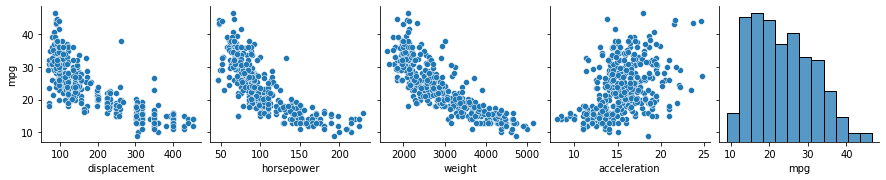

In [9]:
# DATA VISUALIZATION

sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

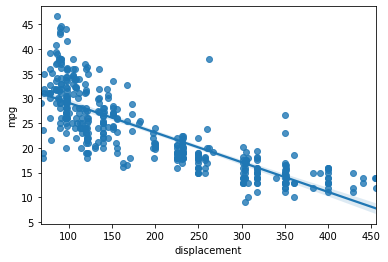

In [10]:
sns.regplot(x='displacement',y='mpg',data=df)

**Define Variables Y and X**

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
y=df['mpg']

In [13]:
y.shape

(392,)

In [14]:
x=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [15]:
x.shape

(392, 4)

**Scaling the Data**

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [17]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [18]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Train Test Split Data**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=3479)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Model**

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
model=LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
model.intercept_

23.338181848527505

In [25]:
model.coef_

array([-1.32254982, -1.05775646, -4.22827709,  0.02769674])

**Predict Test Data**

In [26]:
y_pred=model.predict(x_test)

In [27]:
y_pred

array([15.19226988, 13.85355838, 24.68333543, 19.62867633, 24.93963821,
       30.29066524, 23.96934964, 23.37182375, 30.70686857, 14.70134797,
       15.02609157, 29.2259731 , 31.22051416, 26.91367934, 23.35419797,
       20.11902043, 23.21012756, 28.32534195, 16.09724911, 31.47472221,
       27.4008546 , 20.2252191 , 11.74524475, 26.85350246, 24.85027022,
       15.18472777, 22.67045391,  6.84228622, 11.52592958, 28.36576558,
       25.52951604, 25.68879473, 13.08205136, 30.74199286, 30.29917696,
       19.8439375 , 25.89721312, 30.7898828 , 28.14743041, 26.95709624,
       18.55150809, 24.79326118, 29.7094257 , 27.08368893, 29.54471794,
       27.02336521, 27.65609043, 16.50630478, 17.66407882, 23.15251437,
       16.99783818, 27.34551095,  8.97671746, 31.28054318, 16.12796131,
       25.31556247, 22.23130775, 14.73197593, 28.97434906, 29.48798099,
       26.21525503, 22.11189772, 11.76759487, 20.64417183, 14.32116086,
       31.20307679, 20.8574083 , 23.96388624, 28.76592533, 26.66

**Model Accuracy**

In [28]:
from sklearn.metrics import mean_absolute_percentage_error


In [29]:
mean_absolute_percentage_error(y_test,y_pred)

0.1443894118943397

**Polynomial Regression**

In [30]:
from sklearn.preprocessing import PolynomialFeatures 

In [31]:
poly=PolynomialFeatures(degree=2,interaction_only=True, include_bias=False, order='C')

In [32]:
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)

In [33]:
model.fit(x_train2,y_train)


LinearRegression()

In [34]:
model.intercept_

21.146486098741516

In [35]:
model.coef_

array([-3.55857772, -4.43358102, -0.97846275, -0.64957882,  2.76041878,
        0.53733797, -0.16588388, -0.71262922,  0.10026346,  0.39524025])

In [36]:
y_pred_poly=model.predict(x_test2)

**Model Accuracy**

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12553040193606052